https://www.dropbox.com/s/k81ljpmzy3fgtx9/Dataset.zip?dl=1https://www.dropbox.com/s/k81ljpmzy3fgtx9/Dataset.zip?dl=1https://www.dropbox.com/s/k81ljpmzy3fgtx9/Dataset.zip?dl=1https://www.dropbox.com/s/k81ljpmzy3fgtx9/Dataset.zip?dl=1https://www.dropbox.com/s/k81ljpmzy3fgtx9/Dataset.zip?dl=1https://www.dropbox.com/s/k81ljpmzy3fgtx9/Dataset.zip?dl=1# <font style="color:blue">Project 3: Object Detection</font>


#### Maximum Points: 100

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Section</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Plot Ground Truth Bounding Boxes</h3></td> <td><h3>20</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Training</h3></td> <td><h3>25</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>Inference</h3></td> <td><h3>15</h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3>COCO Detection Evaluation</h3></td> <td><h3>25</h3></td> </tr>
        <tr><td><h3>5</h3></td> <td><h3>Run Inference on a Video</h3></td> <td><h3>15</h3></td> </tr>
    </table>
</div>


# <font style="color:purple">Download the Dataset</font> 

**[Download the Vehicle registration plate](https://www.dropbox.com/s/k81ljpmzy3fgtx9/Dataset.zip?dl=1)**


Download the Vehicle Registration Plate dataset from [here](https://www.dropbox.com/s/k81ljpmzy3fgtx9/Dataset.zip?dl=1) and unzip it. 

We will have the following directory structure:

```
Dataset
├── train
│   └── Vehicle registration plate
│       └── Label
└── validation
    └── Vehicle registration plate
        └── Label
```

Unzipping the file will give you a directory `Dataset`. This directory has two folder `train` and `validation`. Each train and validation folder has `Vehicle registration plate`  folder with `.jpg` images and a folder `Labels`.  `Labels` folder has bounding box data for the images.


For example,
For image: `Dataset/train/Vehicle registration plate/bf4689922cdfd532.jpg`
Label file is  `Dataset/train/Vehicle registration plate/Label/bf4689922cdfd532.txt`

There are one or more lines in each `.txt` file. Each line represents one bounding box.
For example,
```
Vehicle registration plate 385.28 445.15 618.24 514.225
Vehicle registration plate 839.68 266.066462 874.24 289.091462
```

We have a single class detection (`Vehicle registration plate detection`) problem. So bounding box details start from the fourth column in each row.

Representation is in `xmin`, `ymin`, `xmax`, and `ymax` format.

**It has `5308` training and `386` validation dataset.**

Data is downloaded from [Open Images Dataset](https://storage.googleapis.com/openimages/web/index.html)

#  <font style="color:green">1. Plot Ground Truth Bounding Boxes [20 Points]</font> 

**You have to show three images from validation data with the bounding boxes.**

The plotted images should be similar to the following:

<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-g1.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-g2.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-g3.png'>



In [1]:
#Install pycocotools
!pip -q install pycocotools

In [2]:
try:
    !git clone https://github.com/facebookresearch/detectron2.git
except:
    pass
%cd /kaggle/working/detectron2
!pip -q install -e ./

Cloning into 'detectron2'...
remote: Enumerating objects: 15297, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 15297 (delta 7), reused 11 (delta 5), pack-reused 15275
Receiving objects: 100% (15297/15297), 6.18 MiB | 8.42 MiB/s, done.
Resolving deltas: 100% (11118/11118), done.
/kaggle/working/detectron2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 23.8.0 requires pandas<1.6.0dev0,>=1.3, but you have pandas 2.0.3 which is incompatible.
cudf 23.8.0 requires protobuf<5,>=4.21, but you have protobuf 3.20.3 which is incompatible.
cuml 23.8.0 requires dask==2023.7.1, but you have dask 202

In [3]:
%matplotlib inline

In [62]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import torch
import numpy as np
import cv2
import random
import os
import matplotlib.pyplot as plt
from pprint import pprint
import torchvision.transforms as T
from albumentations.pytorch import ToTensorV2
from IPython.display import HTML

# model_zoo has lots of pre-trained models
from detectron2 import model_zoo

# DefaultTrainer is a class for training object detector
from detectron2.engine import DefaultTrainer
# DefaultPredictor is class for inference
from detectron2.engine import DefaultPredictor

# detectron2 has its configuration format
from detectron2.config import get_cfg
# detectron2 has implemented Visualizer of object detection
from detectron2.utils.visualizer import Visualizer

# from DatasetCatalog, detectron2 gets dataset and from MetadatCatalog it gets metadata of the dataset
from detectron2.data import DatasetCatalog, MetadataCatalog

# BoxMode supports bounding boxes in different format
from detectron2.structures import BoxMode

# COCOEvaluator based on COCO evaluation metric, inference_on_dataset is used for evaluation for a given metric
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

# build_detection_test_loader, used to create test loader for evaluation
from detectron2.data import build_detection_test_loader

#  <font style="color:green">1.1. Functions Definition</font> 

In [5]:
# this function extracts the info from the content (please refer to the next cell)
def extract_info(content):
    list = content.split(" ")
    list = list[3:]
    bbox = []
    for item in list:
        bbox.append(int(float(item)))
    return bbox

In [6]:
# Function that loads the datset into detectron2's standard format
def get_vehicle_reg_plate_dicts(data_root, dataset_folder):
    # Create an empty records list
    folder_path = os.path.join(data_root, dataset_folder)
    dataset_dicts = []
    for root, dirs, files in os.walk(folder_path):
        for dir in dirs:
            dir_path = os.path.join(root, dir)
            for file_name in os.listdir(dir_path):
                
                record = {}
                file_path = os.path.join(dir_path, file_name)
                img_id = file_path.rstrip(".txt").split("/")[-1]
                filename = img_id + ".jpg"
                image_path = os.path.join(folder_path, filename)
                height, width = cv2.imread(image_path).shape[:2]
                
                with open (file_path) as file:
                    contents = file.read()
                    contents = contents.split('\n')
                    if  contents[-1] == '':
                        contents.pop()
                        
                record = {
                    'file_name': image_path,
                    'image_id': img_id, 
                    'height': height,
                    'width': width
                }
                
                objs = [] # Here we will append the annotations
                
                for content in contents:
                    if content.startswith('Vehicle registration plate'):
                        bbox = extract_info(content)
                        obj= {
                            'bbox': bbox,
                            'bbox_mode': BoxMode.XYXY_ABS,
                            'category_id': 0,
                        }
                        objs.append(obj)
                        
                record['annotations'] = objs
                
                # Append the dictionary for the current file to the list
                dataset_dicts.append(record)
                
    return dataset_dicts

In [7]:
# Function to plot bboxes in the images
def plot_bboxes(filename_path, img_annotations):
    image = cv2.imread(filename_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    key_word = "bbox"
    for annotation in img_annotations:
        x_min, y_min, x_max, y_max = annotation[key_word]
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        text = "Reg-Plate"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        font_thickness = 1
        text_size, _ = cv2.getTextSize(text, font, font_scale, font_thickness)
        text_position = (x_min, y_min - 5)
        cv2.rectangle(image, (x_min, y_min - text_size[1]), (x_min + text_size[0], y_min), (0, 0, 0), cv2.FILLED)
        cv2.putText(image, text, text_position, font, font_scale, (255, 255, 255), font_thickness, cv2.LINE_AA)
    plt.imshow(image)
    plt.show()

In [8]:
def plot_randomizer(dataset_dicts):
    #Plot bboxes in the images, 3 examples randomized
    num_examples = 3
    for i in range(num_examples):
        rand_int = torch.randint(low=0, high=len(dataset_dicts), size=(1,)).item()

        # select the image data with the rand_int
        img_data = dataset_dicts[rand_int]

        # get the image id
        img_file_name = img_data["file_name"]
        img_id = img_data["image_id"]
        img_annotations = img_data["annotations"]

        plot_bboxes(img_file_name, img_annotations)  

In [9]:
# Function to count lines in labels folder path
def count_lines(data_root, dataset_folder):
    folder_path = os.path.join(data_root, dataset_folder)
    try:
        # List all files in the directory
        files = os.listdir(folder_path)

        # Count the number of files
        file_count = len(files)

        # Print the result
        print(f'The number of files in {folder_path} is: {file_count}')

        # If you want to list the files, uncomment the next line
        # print(f'Files in {directory_path}: {files}')

    except FileNotFoundError:
        print(f'The directory {folder_path} does not exist.')
        
    return file_count

In [10]:
# Configurations
data_root = "/kaggle/input/vehivle-registration-plate/Dataset" # Change Paths
train_folder = "train/Vehicle registration plate"
test_folder = "validation/Vehicle registration plate"

train_data_name = 'reg_plate_train_1'
test_data_name = 'reg_plate_test_1'

thing_classes = ["vehicle-reg-plate"]

output_dir = 'outputs'

train_img_count = count_lines(data_root, train_folder)

The number of files in /kaggle/input/vehivle-registration-plate/Dataset/train/Vehicle registration plate is: 5309


In [11]:
# Register train and test data
# dataset can be registered only once with one name

# register train data
DatasetCatalog.register(name=train_data_name, 
                        func=lambda: get_vehicle_reg_plate_dicts(data_root, train_folder))

train_metadata = MetadataCatalog.get(train_data_name).set(thing_classes=thing_classes)

# register test data
DatasetCatalog.register(name=test_data_name, 
                        func=lambda: get_vehicle_reg_plate_dicts(data_root, test_folder))

test_metadata = MetadataCatalog.get(test_data_name).set(thing_classes=thing_classes)

#  <font style="color:green">1.2. Data Visualization</font> 

In [12]:
# DATA Visualization

# load datsets
train_dataset = get_vehicle_reg_plate_dicts(data_root, train_folder)
test_dataset = get_vehicle_reg_plate_dicts(data_root, test_folder)

# Print datset structures
print("Structure for train dataset: \n")
pprint(train_dataset[3])

print("\n")

print("Structure for test dataset: \n")
pprint(test_dataset[3])

Structure for train dataset: 

{'annotations': [{'bbox': [122, 639, 145, 645],
                  'bbox_mode': <BoxMode.XYXY_ABS: 0>,
                  'category_id': 0},
                 {'bbox': [200, 649, 218, 654],
                  'bbox_mode': <BoxMode.XYXY_ABS: 0>,
                  'category_id': 0}],
 'file_name': '/kaggle/input/vehivle-registration-plate/Dataset/train/Vehicle '
              'registration plate/688f112cf2794184.jpg',
 'height': 768,
 'image_id': '688f112cf2794184',
 'width': 1024}


Structure for test dataset: 

{'annotations': [{'bbox': [257, 299, 356, 374],
                  'bbox_mode': <BoxMode.XYXY_ABS: 0>,
                  'category_id': 0}],
 'file_name': '/kaggle/input/vehivle-registration-plate/Dataset/validation/Vehicle '
              'registration plate/19eba8ac64eed194.jpg',
 'height': 768,
 'image_id': '19eba8ac64eed194',
 'width': 1024}


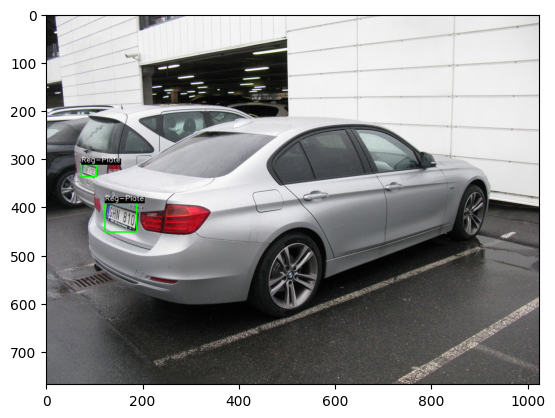

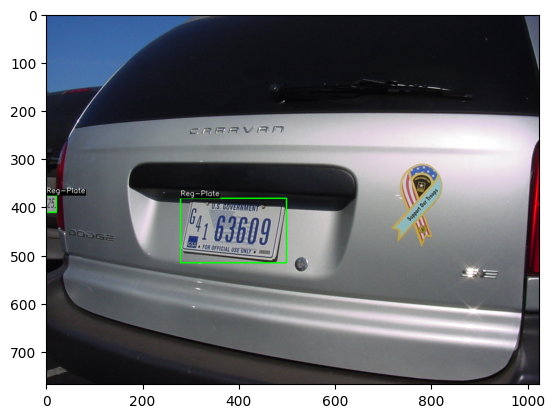

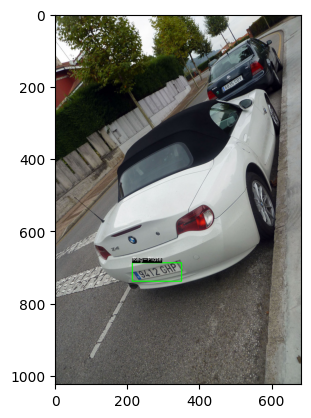

In [13]:
# Plot images for train set
plot_randomizer(train_dataset)

#  <font style="color:green">1.3. Detectron2 Configuration </font> 

In [14]:
# detectron2 configuration

# default configuration
cfg = get_cfg()

# update configuration with RetinaNet configuration
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/retinanet_R_50_FPN_3x.yaml"))

# We have registered the train and test data set with name reg_plat_train_1 and reg_plate_test_1. 
# Let's replace the detectron2 default train dataset with our train dataset.
cfg.DATASETS.TRAIN = (train_data_name,)

# No metric implemented for the test dataset, we will have to update cfg.DATASET.TEST with empty tuple
cfg.DATASETS.TEST = ()

In [15]:
# data loader configuration
cfg.DATALOADER.NUM_WORKERS = 4

In [16]:
# GPUs to be used
cfg.SOLVER.NUM_GPUS = 2

In [17]:
# Update model URL in detectron2 config file
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/retinanet_R_50_FPN_3x.yaml")

In [18]:
# solver configuration

# batch size
cfg.SOLVER.IMS_PER_BATCH = 4

# choose a good learning rate
cfg.SOLVER.BASE_LR = 0.001

# We need to specify the number of iteration for training in detectron2, not the number of epochs.
# lets convert number of epoch to number or iteration (max iteration)

epoch = 2
max_iter = int(epoch * train_img_count / cfg.SOLVER.IMS_PER_BATCH)
# max_iter = 500

cfg.SOLVER.MAX_ITER = max_iter

In [19]:
# number of output class
# we have only one class that is reg-plates
cfg.MODEL.RETINANET.NUM_CLASSES = len(thing_classes)

In [20]:
# update create ouptput directory 
cfg.OUTPUT_DIR = output_dir
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

#  <font style="color:green">2. Training [25 Points]</font> 

- **Write your training code in this section.**

- **You also have to share ([shared logs example](https://tensorboard.dev/experiment/JRtnsKbwTaq1ow6nPLPGeg)) the loss plot of your training using tensorboard.dev.** 

How to share TensorBoard logs using tensorboard.dev find [here](https://courses.opencv.org/courses/course-v1:OpenCV+OpenCV-106+2019_T1/courseware/b1c43ffe765246658e537109e188addb/d62572ec8bd344db9aeae81235ede618/4?activate_block_id=block-v1%3AOpenCV%2BOpenCV-106%2B2019_T1%2Btype%40vertical%2Bblock%40398b46ddcd5c465fa52cb4d572ba3229).

In [21]:
# Look at training curves in tensorboard:
%load_ext tensorboard
# %reload_ext tensorboard
%tensorboard --logdir /kaggle/working/detectron2/outputs

In [22]:
# training

# Create a trainer instance with the configuration.
trainer = DefaultTrainer(cfg) 

[12/23 16:09:34 d2.engine.defaults]: Model:
RetinaNet(
  (backbone): FPN(
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(2048, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2)

In [23]:
# if resume=False, because we don't have trained model yet. It will download model from model url and load it
trainer.resume_or_load(resume=False)

# start training
trainer.train()

[12/23 16:10:47 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/retinanet_R_50_FPN_3x/190397829/model_final_5bd44e.pkl ...


model_final_5bd44e.pkl: 152MB [00:03, 42.4MB/s]                              

[12/23 16:10:51 d2.engine.train_loop]: Starting training from iteration 0



/opt/conda/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[12/23 16:11:23 d2.utils.events]:  eta: 0:37:57  iter: 19  total_loss: 1.541  loss_cls: 1.196  loss_box_reg: 0.4756    time: 1.0822  last_time: 0.7880  data_time: 0.0284  last_data_time: 0.0131   lr: 1.9981e-05  max_mem: 3270M
[12/23 16:11:44 d2.utils.events]:  eta: 0:37:06  iter: 39  total_loss: 1.637  loss_cls: 1.194  loss_box_reg: 0.4275    time: 1.0059  last_time: 0.9888  data_time: 0.0198  last_data_time: 0.0601   lr: 3.9961e-05  max_mem: 3275M
[12/23 16:12:01 d2.utils.events]:  eta: 0:36:55  iter: 59  total_loss: 1.547  loss_cls: 1.004  loss_box_reg: 0.51    time: 0.9536  last_time: 0.8606  data_time: 0.0156  last_data_time: 0.0120   lr: 5.9941e-05  max_mem: 3275M
[12/23 16:12:19 d2.utils.events]:  eta: 0:36:59  iter: 79  total_loss: 1.147  loss_cls: 0.7803  loss_box_reg: 0.3311    time: 0.9359  last_time: 1.0671  data_time: 0.0164  last_data_time: 0.0115   lr: 7.9921e-05  max_mem: 3275M
[12/23 16:12:37 d2.utils.events]:  eta: 0:37:37  iter: 99  total_loss: 0.9828  loss_cls: 0.64

#  <font style="color:green">3. Inference [15 Points]</font> 

**You have to make predictions from your trained model on three images from the validation dataset.**

The plotted images should be similar to the following:

<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-p1.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-p2.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-p3.png'>




In [24]:
# inference on our fine-tuned model

# By default detectron2 save the model with name model_final.pth
# update the model path in configuration that will be used to load the model
#Check if model weights exists
input_path = "/kaggle/input/model-weights/model_final.pth" # Change Paths
if os.path.exists(input_path):
    cfg.MODEL.WEIGHTS = input_path
else:
    cfg.MODEL.WEIGHTS = os.path.join(ffg.OUTPUT_DIR, "model_final.pth")


# update RetinaNet score threshold 
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.5

cfg.DATASETS.TEST = (test_data_name,)

# create a predictor instance with the configuration (it has our fine-tuned model)
# this predictor does prdiction on a single image
predictor = DefaultPredictor(cfg)

[12/23 16:50:44 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /kaggle/input/model-weights/model_final.pth ...


/kaggle/input/vehivle-registration-plate/Dataset/validation/Vehicle registration plate/ee047c8ca2cca8a2.jpg
{'instances': Instances(num_instances=1, image_height=768, image_width=1024, fields=[pred_boxes: Boxes(tensor([[395.4830, 324.7726, 681.5881, 425.3839]], device='cuda:0')), scores: tensor([0.8202], device='cuda:0'), pred_classes: tensor([0], device='cuda:0')])}


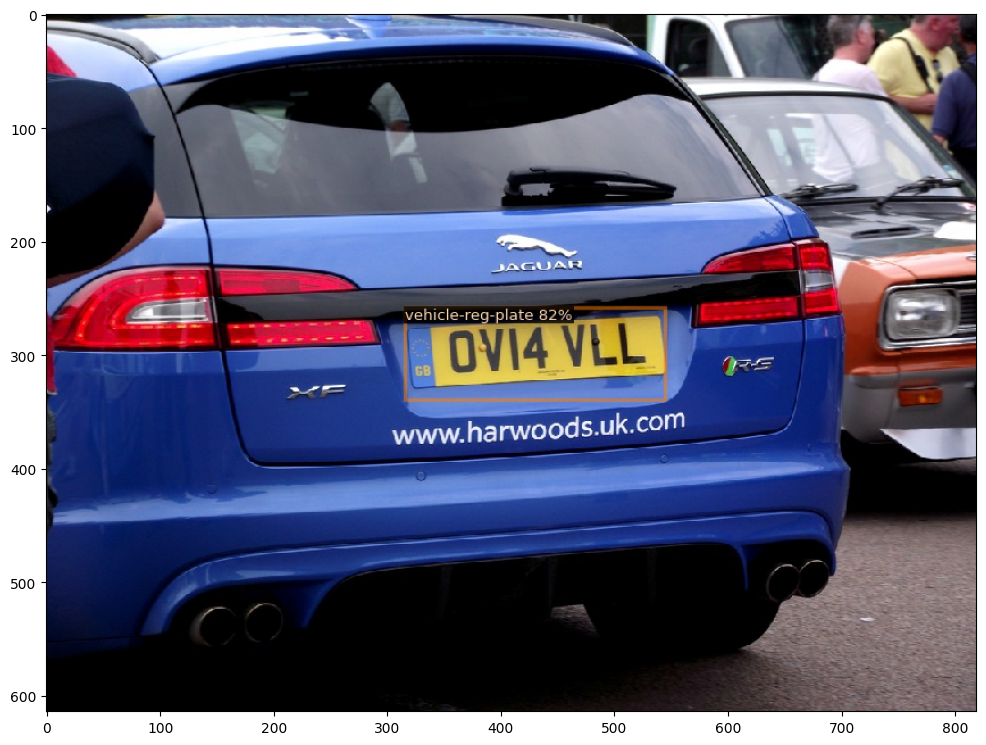

/kaggle/input/vehivle-registration-plate/Dataset/validation/Vehicle registration plate/27798906120ea394.jpg
{'instances': Instances(num_instances=3, image_height=724, image_width=1024, fields=[pred_boxes: Boxes(tensor([[188.4040, 403.3758, 339.1865, 480.1143],
        [290.8913, 233.4556, 322.0473, 257.8581],
        [891.2822, 177.7614, 967.5565, 197.5858]], device='cuda:0')), scores: tensor([0.8551, 0.8070, 0.6753], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


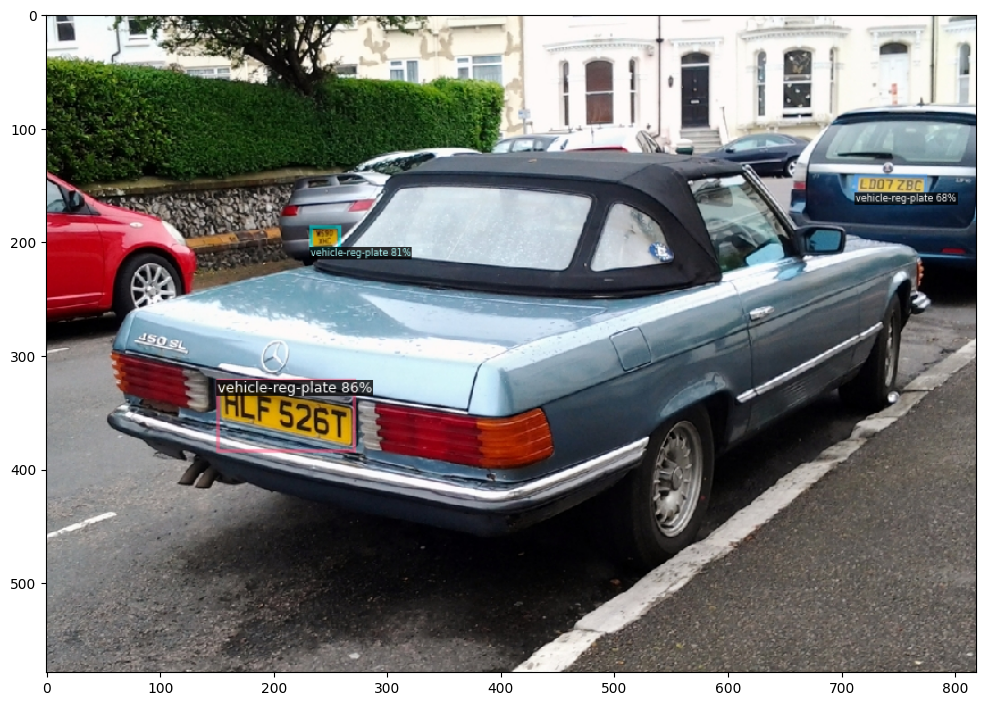

/kaggle/input/vehivle-registration-plate/Dataset/validation/Vehicle registration plate/5290f4027491d09b.jpg
{'instances': Instances(num_instances=1, image_height=768, image_width=1024, fields=[pred_boxes: Boxes(tensor([[152.1906, 542.1974, 338.9135, 610.9346]], device='cuda:0')), scores: tensor([0.7908], device='cuda:0'), pred_classes: tensor([0], device='cuda:0')])}


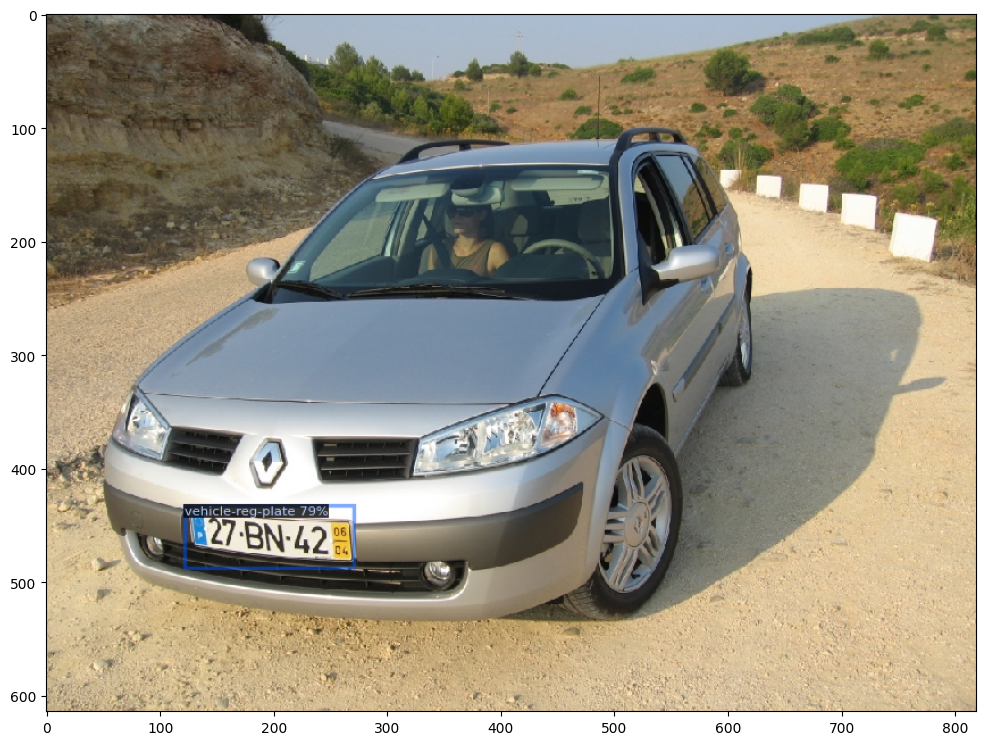

In [25]:
# let's have a look on prediction

for d in random.sample(test_dataset, 3):
    print(d["file_name"])
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    print(outputs)
    v = Visualizer(im[:, :, ::-1],
                   metadata=test_metadata, 
                   scale=0.8
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (12, 12))
    plt.imshow(v.get_image())
    plt.show()

In [26]:
print(im.shape)
print(type(im))

(768, 1024, 3)
<class 'numpy.ndarray'>


#  <font style="color:green">4. COCO Detection Evaluation [25 Points]</font> 

**You have to evaluate your detection model on COCO detection evaluation metric.**

For your reference here is the coco evaluation metric chart:


---

<img src="https://www.learnopencv.com/wp-content/uploads/2020/03/c3-w9-coco_metric.png">

---

#### <font style="color:red">The expected `AP` (primary challenge metric) is more than `0.5`.</font>

**The expected output should look similar to the following:**

```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.550
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.886
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.629
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.256
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.653
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.627
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.504
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.629
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.633
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.380
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.722
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.704
```



In [27]:
# create directory for evaluation
eval_dir = os.path.join(cfg.OUTPUT_DIR, 'coco_eval')
os.makedirs(eval_dir, exist_ok=True)

# create evaluator instance with coco evaluator
evaluator = COCOEvaluator(dataset_name=test_data_name, 
                          tasks=cfg, 
                          distributed=False, 
                          output_dir=eval_dir)

# create validation data loader
val_loader = build_detection_test_loader(cfg, test_data_name)

# start validation
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [12/23 16:50:49 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[12/23 16:50:49 d2.evaluation.coco_evaluation]: Trying to convert 'reg_plate_test_1' to COCO format ...
[12/23 16:50:49 d2.data.datasets.coco]: Converting annotations of dataset 'reg_plate_test_1' to COCO format ...)
[12/23 16:50:55 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[12/23 16:50:55 d2.data.datasets.coco]: Conversion finished, #images: 386, #annotations: 512
[12/23 16:50:55 d2.data.datasets.coco]: Caching COCO format annotations at 'outputs/coco_eval/reg_plate_test_1_coco_format.json' ...
[12/23 16:51:00 d2.data.build]: Distribution of instances among all 1 categories:
|   category    | #instances   |
|:-------------:|:-------------|
| vehicle-reg.. | 512          |
|               |              |
[12/23 16:51:00 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [

OrderedDict([('bbox',
              {'AP': 59.17304357245333,
               'AP50': 88.99199438562263,
               'AP75': 68.31052454421511,
               'APs': 26.5352932831453,
               'APm': 69.44785626949216,
               'APl': 67.28449014299046})])

# <font style="color:green">5. Run Inference on a Video [15 Points]</font>

#### [Download the Input Video](https://www.dropbox.com/s/g88o4dx18zpgn8k/projet3-input-video.mp4?dl=1)

**You have to run inference on a video.** 

You can download the video from [here](https://www.dropbox.com/s/g88o4dx18zpgn8k/projet3-input-video.mp4?dl=1).

#### <font style="color:red">Upload the output video on youtube and share the link. Do not upload the video in the lab.</font>

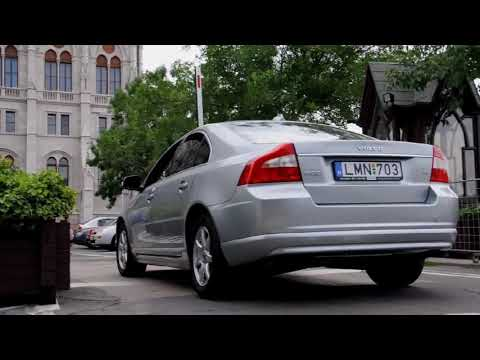

In [28]:
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("18HWHCevFdU", width=640, height=360)
display(video)

**Your output video should have a bounding box around the vehicle registration plate.**

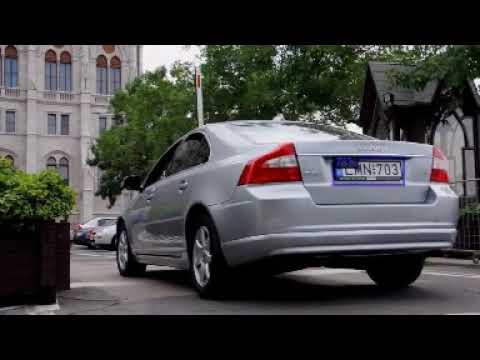

In [29]:
video = YouTubeVideo("5SgCuee7AMs", width=640, height=360)
display(video)

In [58]:
import os
import cv2
import torch
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
import matplotlib.pyplot as plt

def video_read_write(video_path, output_location):
    """
    Read video frames one-by-one, perform inference, and write the output video.
    video_path (str): path/to/video
    output_location (str): path/to/output
    """
    video = cv2.VideoCapture(video_path)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    predictor = DefaultPredictor(cfg)

    # Check if the camera opened successfully
    if not video.isOpened():
        print("Error opening video file")
        return

    # Create the video writer
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frames_per_second = video.get(cv2.CAP_PROP_FPS)

    frames = []  # List to store all frames

    while video.isOpened():
        ret, frame = video.read()
        if ret:
            # Perform inference using the DefaultPredictor
            outputs = predictor(frame)
            print(outputs)

            # Extract prediction information from the outputs
            instances = outputs["instances"]
            
            v = Visualizer(frame[:, :, ::-1], metadata=None, scale=0.5)
            
            v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
            
            image = v.get_image()[:, :, ::-1]  # Convert back to BGR format
            
            # Resize the image to match the frame dimensions
            image = cv2.resize(image, (width, height))
            
            frames.append(image)
            
            # Write the frame to the output video
            output_file.write(image)
            
        else:
            break

    video.release()
    output_file.release()

    # Stack all frames to create a new video
    stacked_output_fname = os.path.join(output_location, 'stacked_output_video.mp4')

    # Try using a different FourCC code (e.g., "XVID")
    stacked_output_file = cv2.VideoWriter(
        filename=stacked_output_fname,
        fourcc=cv2.VideoWriter_fourcc(*"XVID"),
        fps=float(frames_per_second),
        frameSize=(width, height),
        isColor=True,
    )

    for frame in frames:
        stacked_output_file.write(frame)

    stacked_output_file.release()

    print("Stacked video created:", stacked_output_fname)


**You can use the following sample code to read and write a video.**

In [31]:
video_path = "/kaggle/input/video-mp4/projet3-input-video.mp4" # Change Paths
output_location = "/kaggle/working/detectron2/outputs" # Change Paths

In [59]:
video_read_write(video_path, output_location)

[12/23 17:47:27 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /kaggle/input/model-weights/model_final.pth ...
{'instances': Instances(num_instances=0, image_height=720, image_width=1280, fields=[pred_boxes: Boxes(tensor([], device='cuda:0', size=(0, 4))), scores: tensor([], device='cuda:0'), pred_classes: tensor([], device='cuda:0', dtype=torch.int64)])}
{'instances': Instances(num_instances=0, image_height=720, image_width=1280, fields=[pred_boxes: Boxes(tensor([], device='cuda:0', size=(0, 4))), scores: tensor([], device='cuda:0'), pred_classes: tensor([], device='cuda:0', dtype=torch.int64)])}
{'instances': Instances(num_instances=0, image_height=720, image_width=1280, fields=[pred_boxes: Boxes(tensor([], device='cuda:0', size=(0, 4))), scores: tensor([], device='cuda:0'), pred_classes: tensor([], device='cuda:0', dtype=torch.int64)])}
{'instances': Instances(num_instances=0, image_height=720, image_width=1280, fields=[pred_boxes: Boxes(tensor([], device=

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Stacked video created: /kaggle/working/detectron2/outputs/stacked_output_video.mp4


In [65]:
output_video_location = "/kaggle/input/stacked-output-video/stacked_output_video.mp4" # Change Paths
HTML(f'<video controls src="{output_video_location}" width="500" height="300">')